<a href="https://colab.research.google.com/github/KorvenDalas/HFT/blob/main/CW1_HFT_02_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#H) Simulation of Two Assets

In [87]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for Visa and MasterCard
ticker_V = 'V'      # Ticker symbol for Visa
ticker_MA = 'MA'    # Ticker symbol for MasterCard

# Define the date range and time interval
start_date = '2025-02-05'
end_date = '2025-02-06'
time_interval = '1m'

# Download the data
df_V = yf.download(ticker_V, start = start_date, end = end_date, interval = time_interval)
df_MA = yf.download(ticker_MA, start = start_date, end = end_date, interval = time_interval)

# Check and print the number of data points for each asset
print("\n")
print("Data length for Visa (V):", len(df_V))
print("Data length for MasterCard (MA):", len(df_MA))
if len(df_V) == len(df_MA):
    print("Both dataset have the same length")
else:
    print("The datasets have different length")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data length for Visa (V): 389
Data length for MasterCard (MA): 383
The datasets have different length


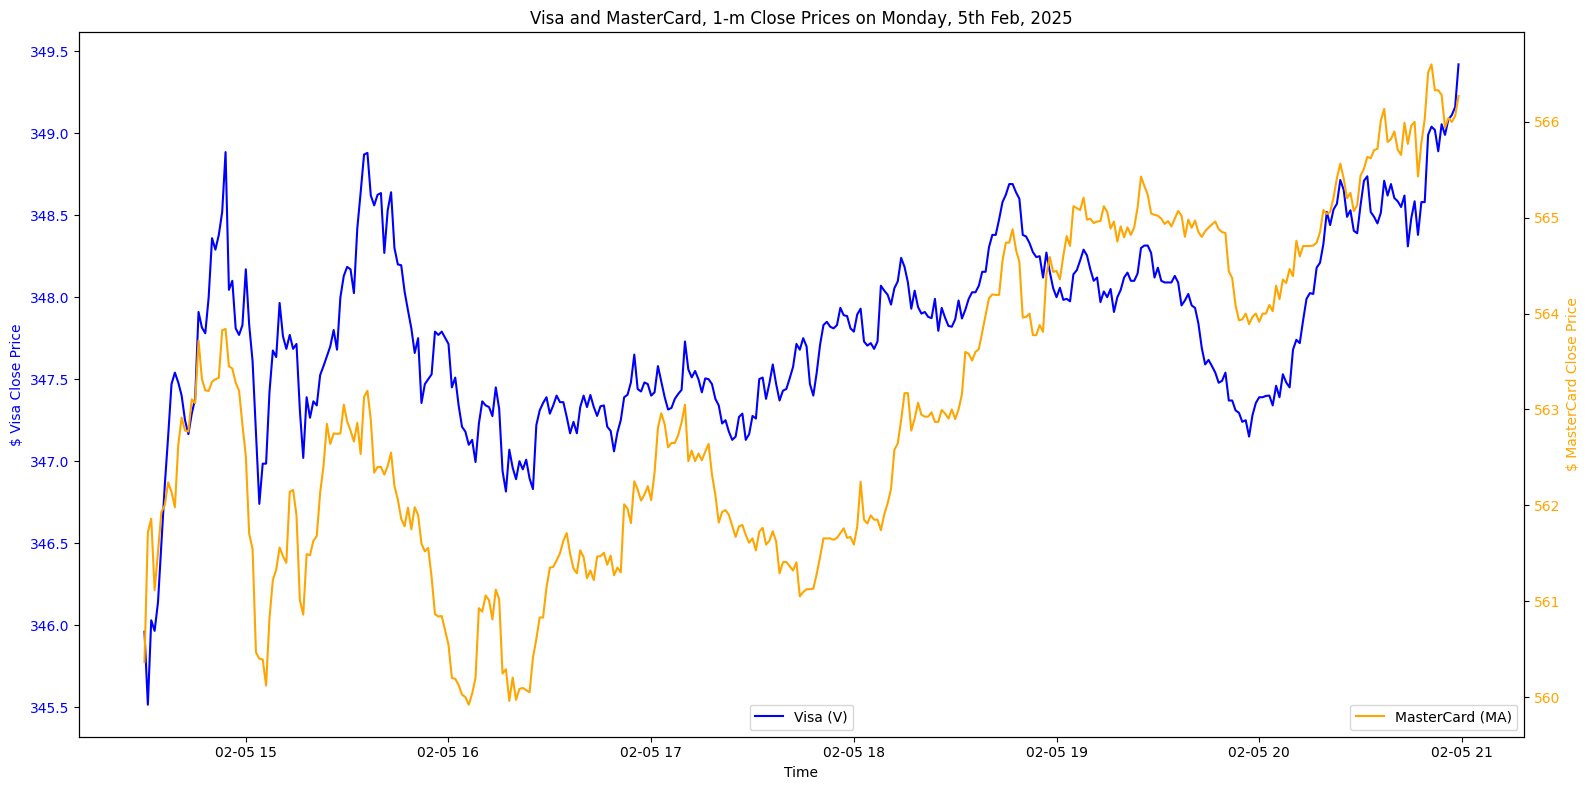

In [88]:
# Plotting with dual y-axes
fig, ax1 = plt.subplots(figsize = (16, 8))

# Plot Visa data on left y-axis
ax1.plot(df_V.index, df_V['Close'], color = 'blue', label = 'Visa (V)')
ax1.set_xlabel('Time')
ax1.set_ylabel('$ Visa Close Price', color = 'blue')
ax1.tick_params(axis='y', labelcolor = 'blue')
ax1.legend(loc = "lower center")

# Create a twin Axes sharing the same x-axis for MasterCard data
ax2 = ax1.twinx()
ax2.plot(df_MA.index, df_MA['Close'], color = 'orange', label = 'MasterCard (MA)')
ax2.set_ylabel('$ MasterCard Close Price', color = 'orange')
ax2.tick_params(axis='y', labelcolor = 'orange')
ax2.legend(loc = "lower right")

plt.title('Visa and MasterCard, 1-m Close Prices on Monday, 5th Feb, 2025')
plt.tight_layout()
plt.show()

In [120]:
# Defining the initial parameters
# Set initial conditions for the simulation, based on the real assets
S1_0 = 346.0        # Opening price of Visa
S2_0 = 561.35       # Opening price of MasterCard
z_0 = 0

# Drift (mean return)
mu_1 = 0.00998
mu_2 = 0.01051

# Volatility
sigma_1 = 0.00848
sigma_2 = 0.00842

# Cointegration and risk
beta = 1.32291
gamma = 0.5
delta = 1
rho = 0.45492

# Time
T = 1
M = 390

In [121]:
# Defining the discrete time step
dt = T/M

# Restarting the dataframes
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

# Restarting the time vector
tt = np.linspace(0, 1, M + 1)

In [122]:
# Initialise values at t=0
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0

# Calculations
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1 / delta) * (mu_1 - sigma_1 ** 2 / 2 + beta * (mu_2 - sigma_2 ** 2 / 2))

# Standard normal random variables for stochastic modeling
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape)
rn2 = np.random.standard_normal(S2.shape)

# Calculate the evolution of the vector and the simulated stock
for t in range(1, M + 1):
    z[t] = z[t - 1] * (1 - delta * (eta - z[t - 1])) * dt + sigma_beta * np.sqrt(dt) * ((sigma_1 + beta * sigma_2 * rho) / sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1 - rho ** 2) / sigma_beta) * rn2[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Simulated Stock Price')

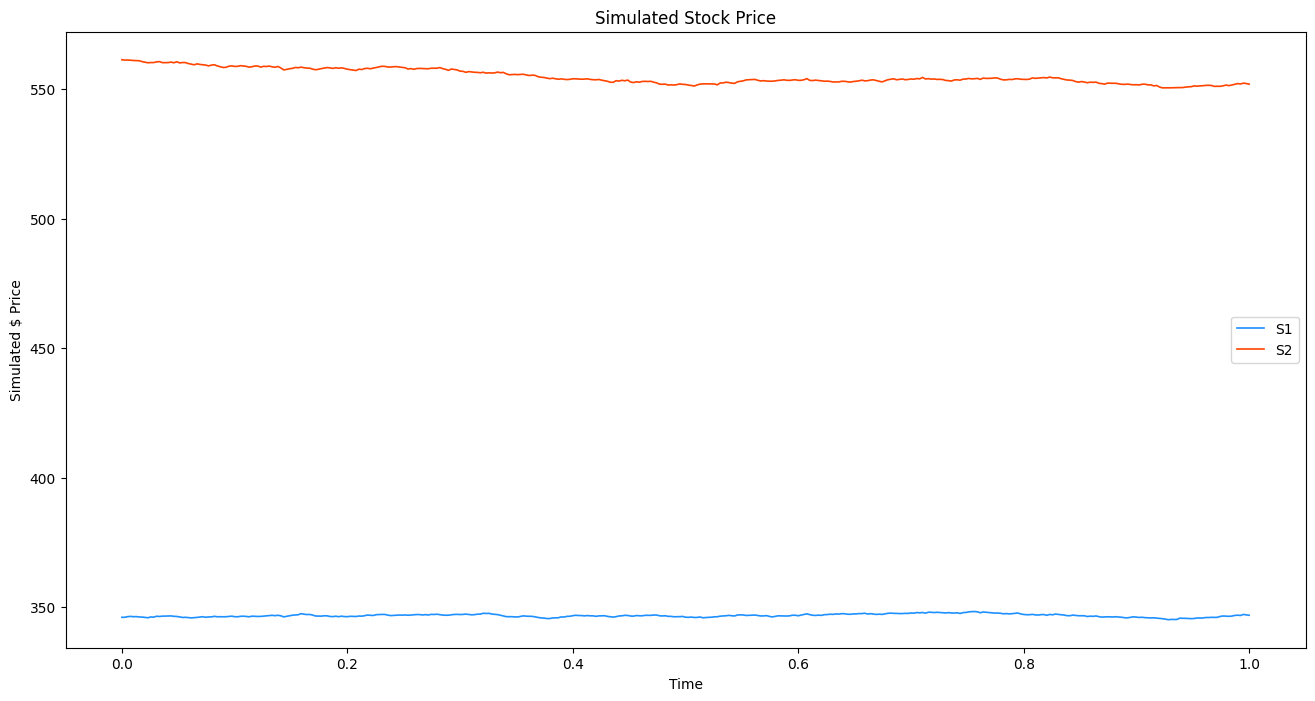

In [123]:
# New colours
blue_V = '#1e90ff'    # DodgerBlue
red_MA = '#ff4500'    # OrangeRed

# Plot Stock Price
plt.figure(figsize = (16, 8))
plt.plot(tt, S1, blue_V, lw = 1.2, label = 'S1')
plt.plot(tt, S2, red_MA, lw = 1.2, label = 'S2')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('Simulated $ Price')
plt.title('Simulated Stock Price')

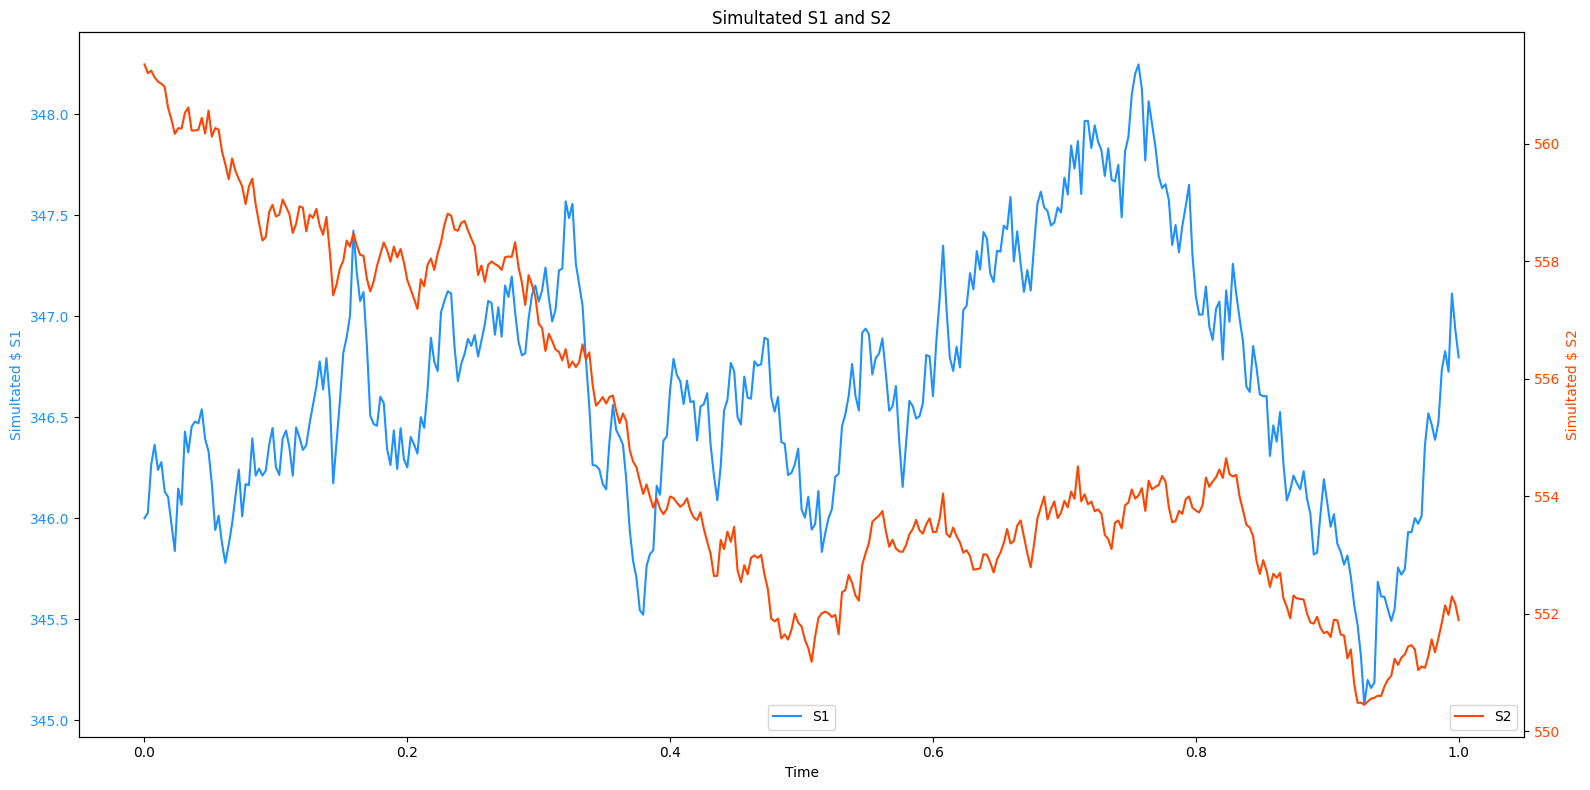

In [124]:
# Plotting with dual y-axes
fig, ax1 = plt.subplots(figsize = (16, 8))

# Plot S1 data on left y-axis
ax1.plot(tt, S1, color = blue_V, label = 'S1')
ax1.set_xlabel('Time')
ax1.set_ylabel('Simultated $ S1', color = blue_V)
ax1.tick_params(axis = 'y', labelcolor = blue_V)
ax1.legend(loc = "lower center")

# Plot S2 data on right y-axis
ax2 = ax1.twinx()
ax2.plot(tt, S2, color = red_MA, label = 'S2')
ax2.set_ylabel('Simultated $ S2', color = red_MA)
ax2.tick_params(axis = 'y', labelcolor = red_MA)
ax2.legend(loc = "lower right")

plt.title('Simultated S1 and S2')
plt.tight_layout()
plt.show()

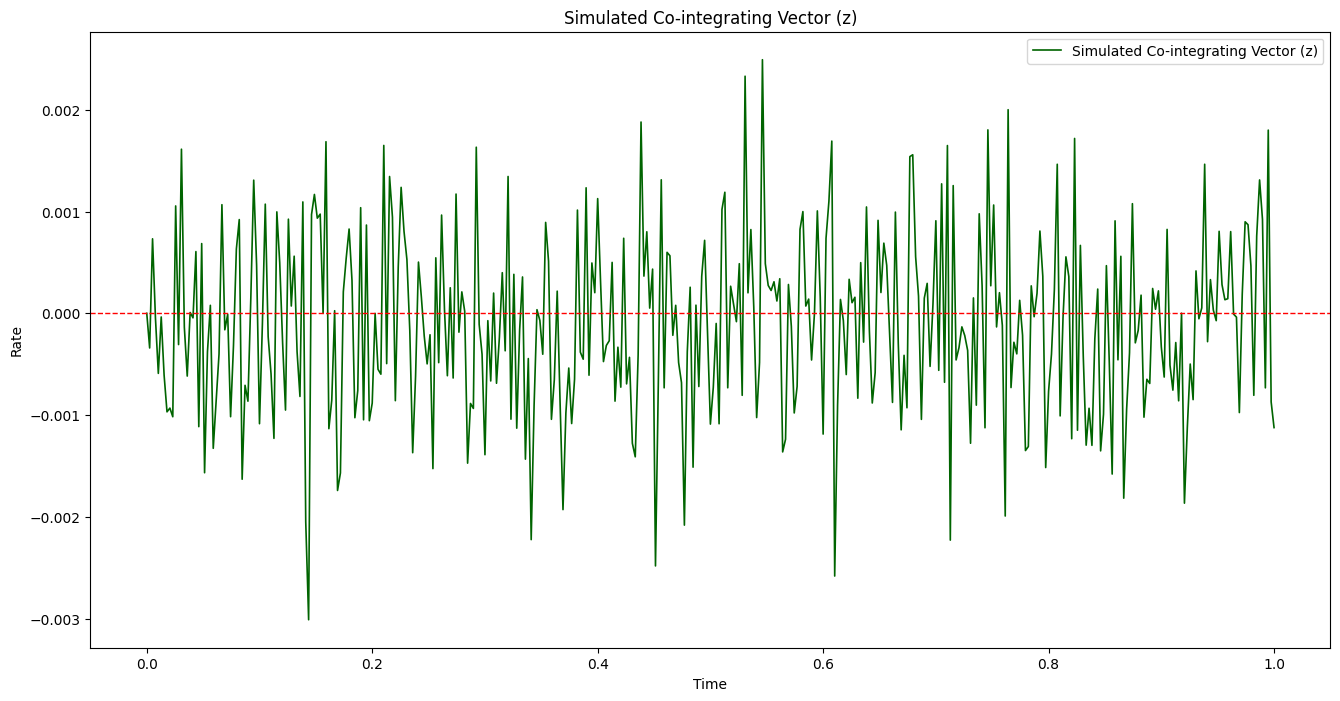

In [125]:
# Plot the simulated co-integrating vector (z) over time (tt)
plt.figure(figsize = (16, 8))
plt.plot(tt, z, 'darkgreen', lw = 1.2, label = "Simulated Co-integrating Vector (z)")
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Simulated Co-integrating Vector (z)')
plt.legend()

# Add a horizontal red line at y = 0
plt.axhline(y = 0, color = 'red', linestyle='--', lw = 1)
plt.show()


In [126]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt) / ((1 - rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2) / ((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt) / ((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt) / ((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta * rho) * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1 / 24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta / gamma * (-2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * mu_2 / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Simulated Optimal Weights')

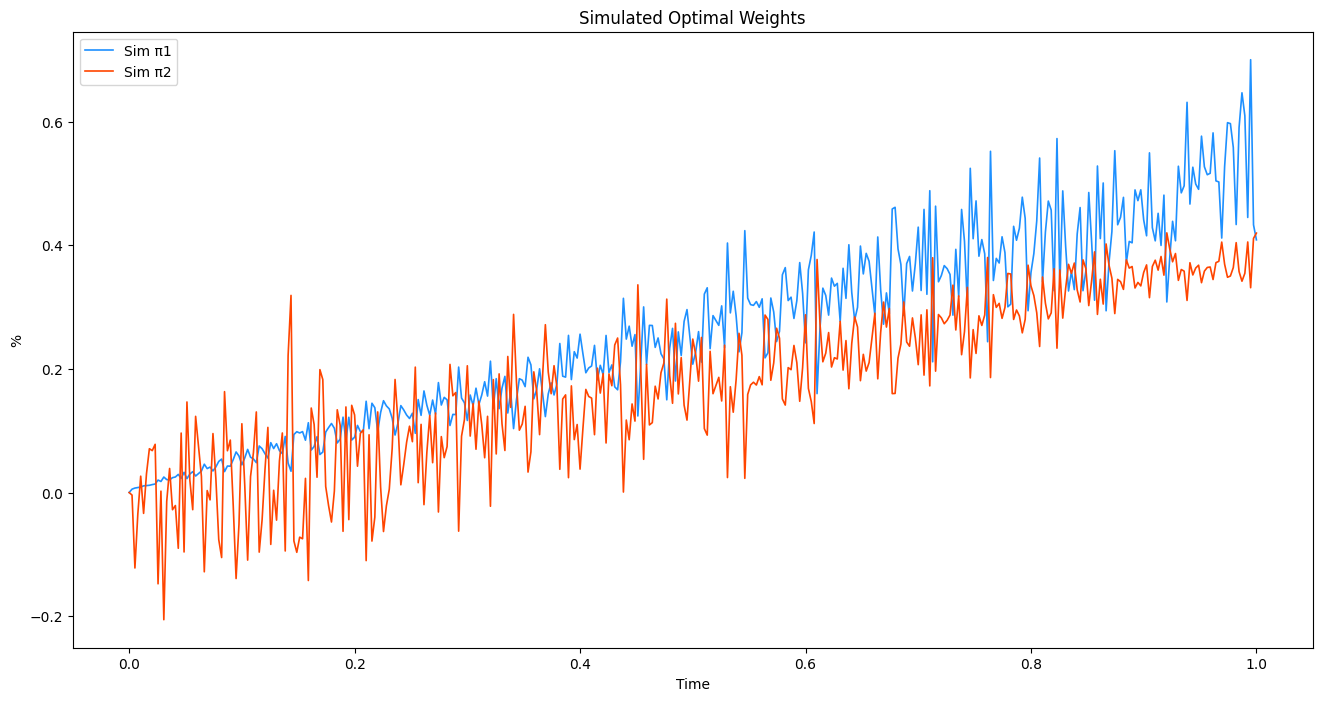

In [127]:
plt.figure(figsize = (16, 8))
plt.plot(tt, Pi_1, color = blue_V, lw = 1.2, label = 'Sim π1')
plt.plot(tt, Pi_2, color = red_MA, lw = 1.2, label = 'Sim π2')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Simulated Optimal Weights')

Text(0.5, 1.0, 'Simulated Cash')

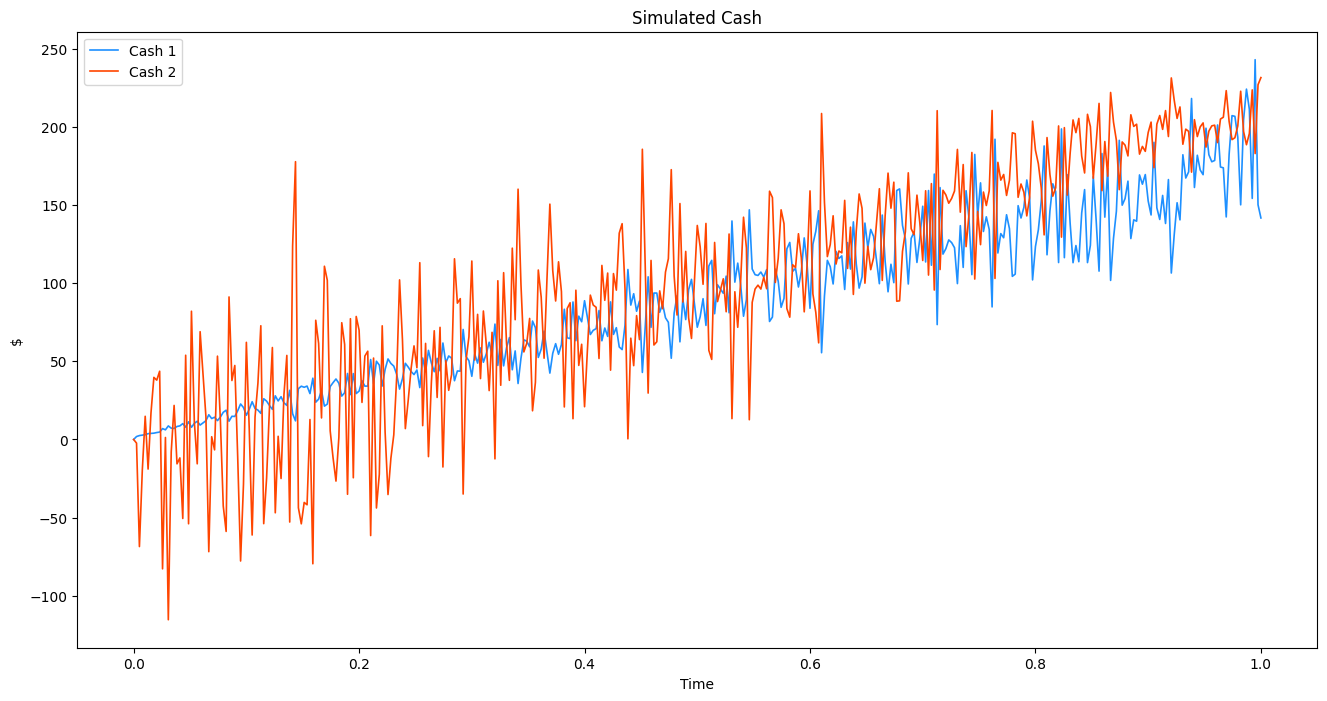

In [128]:
plt.figure(figsize = (16, 8))
plt.plot(tt, Pi_1 * S1, color = blue_V, lw = 1.2, label = 'Cash 1')
plt.plot(tt, Pi_2 * S2, color = red_MA, lw = 1.2, label = 'Cash 2')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulated Cash')

Text(0.5, 1.0, 'Total Simulated Wealth')

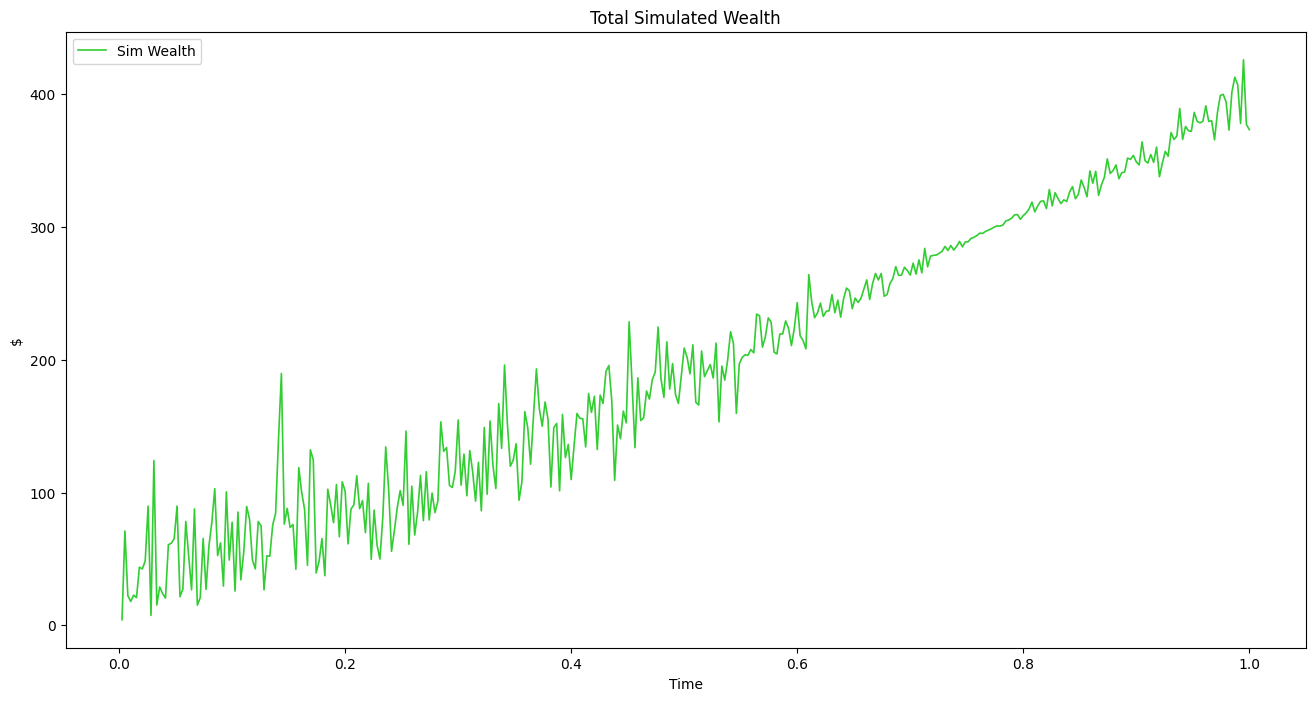

In [129]:
wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

plt.figure(figsize = (16, 8))
plt.plot(tt[1:], wealth[1:], 'limegreen', lw = 1.2, label = 'Sim Wealth')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Total Simulated Wealth')

In [130]:
print(f'Pi_1 mean : {Pi_1.mean()}')
print(f'Pi_2 mean : {Pi_2.mean()}')

Pi_1 mean : 0.25774825308004734
Pi_2 mean : 0.17932824119889912


Text(0.5, 1.0, 'Simulation, Dynamic Vs Static Control')

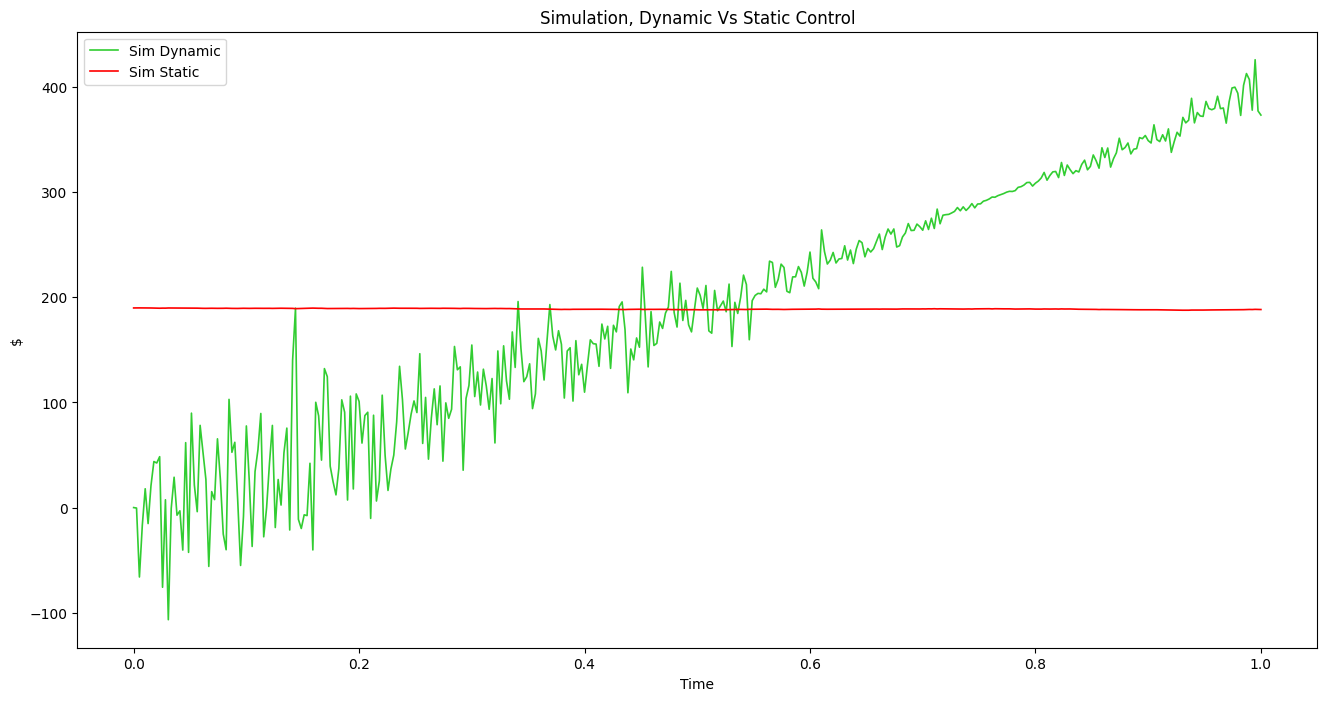

In [131]:
plt.figure(figsize = (16, 8))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'limegreen', lw = 1.2, label = 'Sim Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw = 1.2, label = 'Sim Static')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Simulation, Dynamic Vs Static Control')